# Machine Learning: Exercise session 05

In this exercise session we will focus on LDA and QDA.

In the first problem, we will use the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) and fit LDA and QDA models.

In the second problem, we show analytically that the QDA classifier is a quadratic function of the predictor values.

**Note:** the second problem is theoretical and __not__ needed for the hand in.




## Problem 1

In [5]:
# Import package/module for data
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
# Import modules for feature engineering and modelling
from sklearn.datasets import fetch_openml
from sklearn.model_selection import KFold, train_test_split, GridSearchCV

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)

from sklearn.metrics import accuracy_score

* Import the dataset `digits.csv`, separate the predictors and the target variable and split it into training and test set. When you perform the splitting, set `random_state=40` and `test_size=50`.

In [4]:
df=pd.read_csv("C:/Users/Myriam/Desktop/digits.csv")
df

FileNotFoundError: ignored

In [ ]:
df[df.isna().any(axis=1)]
#no missing values

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256


In [ ]:
X=df.drop('Y',axis=1).copy()
Y=df['Y']

In [ ]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=50, random_state=40)

* We now want to plot some of the observations of the dataset. Each row of the predictor matrix is 256 vector corresponding to a 16 x 16 image. Fill in the `??`.

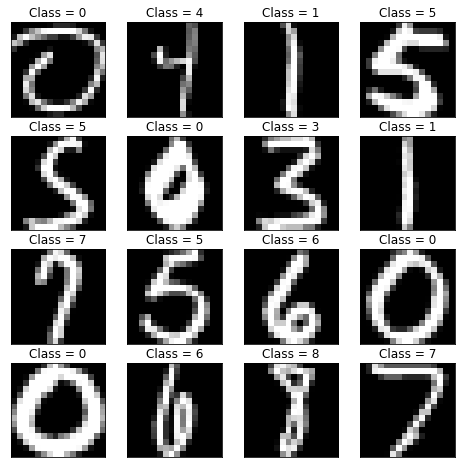

In [ ]:
# Plot some figures
fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        ax[i, j].imshow(
            X_train.sample(random_state=2 * i + 10 * j).to_numpy().reshape(16, 16),
            cmap="gray",
        )
        ax[i, j].set_title(
            "Class = %s" % (y_train.sample(random_state=2 * i + 10 * j).iloc[0])
        )
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
plt.show()

* We now try to fit an LDA model. Before doing so, we need to rescale the data. Fill in the `??`.

In [ ]:
# --- LDA ---
# Scale predictors
scaler = StandardScaler()
scaler.fit(X_train,Y_train)
X_train_scaled = scaler.transform(X_train) #not sure


# Fit lda
lda_class = LinearDiscriminantAnalysis()
lda_class.fit(X_train_scaled, Y_train) #not sure for Y_train

# Predict on training data
Y_train_pred = lda_class.predict(X_train_scaled)
aycc = accuracy_score(Y_train, Y_train_pred)
print("LDA --- Accuracy on training data:", np.round(aycc, 3))

# Predict on test data
X_test_scaled = scaler.transform(X_test)
Y_test_pred = lda_class.predict(X_test_scaled)
acc = accuracy_score(Y_test, Y_test_pred)
print("LDA --- Accuracy on test data:", np.round(acc, 3))

LDA --- Accuracy on training data: 0.939
LDA --- Accuracy on test data: 0.92


* What we did above works. However, you might have noticed that the code is quite repetitive. In fact, we need to rescale _both_ the training and the test dataset, and create intermediate variables. For this reason, we now introduce the `Pipeline` from `sklearn.pipeline`. This is a very convenient functionality that allows to chain several steps one after the other. Fill in the `??`.

In [ ]:
# With the pipeline ...
# Define pipeline
pipe_lda = Pipeline(
    [("scaler", scaler), ("lda", lda_class)]
)

# Fit pipeline
pipe_lda.fit(X_train, Y_train)


# Predict on training data
Y_train_pred = pipe_lda.predict(X_train)
acc = accuracy_score(Y_train, Y_train_pred)
print("LDA --- Accuracy on training data:", np.round(acc, 3))

# Predict on test data
Y_test_pred = pipe_lda.predict(X_test)
acc = accuracy_score(Y_test, Y_test_pred)
print("LDA --- Accuracy on test data:", np.round(acc, 3))


LDA --- Accuracy on training data: 0.939
LDA --- Accuracy on test data: 0.92


* Since LDA estimates the class-conditional means, it is useful to try to understand qualitatively how these look like. Fill in the `??`. What do these mean correspond to?

In [ ]:
means = pipe_lda["lda"].means_.copy() + pipe_lda["scaler"].mean_.reshape(1, 256)

In [ ]:
means[3].shape

(256,)

In [ ]:
pipe_lda["lda"].means_.copy().shape

(10, 256)

In [ ]:
 np.array(np.arange(24)).reshape(3,8) + np.array(np.arange(8)).reshape(1,8)

array([[ 0,  2,  4,  6,  8, 10, 12, 14],
       [ 8, 10, 12, 14, 16, 18, 20, 22],
       [16, 18, 20, 22, 24, 26, 28, 30]])

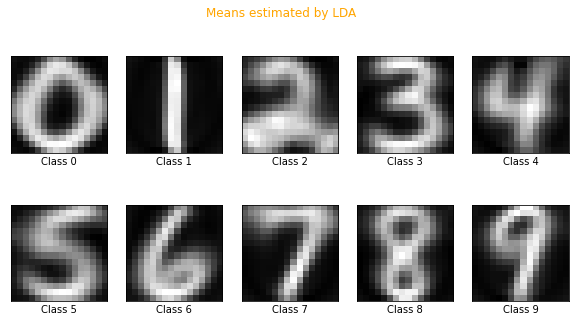

In [ ]:
# Plot means
means = pipe_lda["lda"].means_.copy() + pipe_lda["scaler"].mean_.reshape(1, 256)
plt.figure(figsize=(10, 5))
scale = np.abs(means).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(means[i].reshape(16, 16), cmap="gray")
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Means estimated by LDA", color="orange")
plt.show()

*The LDA method predicts a category (here: the drawing of figures 0 to 9) for each element of ``X_train``. The means correspond to the mean value of each pixel (each pixel on the ``X_train`` has a brightness) in their category:*
$$means[i,j]=\frac{\Sigma_j x_j\cdot1_{y_j=i}}{\Sigma_j 1_{y_j=i} }$$

* Repeat the same analysis as above but now using QDA. Fill in the `??`.

In [ ]:
# QDA

# Define pipeline
pipe_qda = Pipeline(
    [("scaler", scaler), ("qda", )]
)

# Fit pipeline
pipe_qda.fit(??, ??)

* Which warning did you get? Why do you think this happened?

* To solve this, we need to add to each column of the training predictors some random noise. Why does this help? Fill in the `??`.

In [ ]:
# Add noise before fitting again
def add_noise(X, scale):
    """
    DataFrame double -> ndarray
    produce DataFrame adding Gaussian with standard deviation = `scale` to each column of `X`.
    """
    # transform to ndarray
    X_arr = ??.to_numpy()

    # get shape
    n, d = ??.shape

    # add Gaussian noise
    X_arr = ?? + np.random.normal(scale=scale, size=(n, d))

    # back to DataFrame
    df = pd.DataFrame(X_arr, columns=["X" + str(i) for i in range(1, d + 1)])

    # return df
    return df


X_train_noise = add_noise(??, scale=0.1)
pipe_qda.fit(??, ??)

* As we did for QDA, compute the training and test accuracy.

* As we did for QDA, plot the means estimated by QDA. Instead of copy-paste the code from above, write a function that takes as inputs the matrix with the estimated __means__ and produces the desired plot.

* Call the function by passing as an argument the matrix with the estimated means.

## Problem 2 (not to hand in)

This problem is about quadratic discriminant analysis (QDA).
The observations within each class are modeled by a normal distribution with a class specific mean vector and a class specific covariance matrix. We consider the simple case where $p = 1$, (i.e., there is only one feature) and that we have $q = 2$ classes. Thus, for $j=0,1$, the conditional distribution $X\mid Y=j$ of the $j$-th class is one-dimensional normal $N(\mu_j, \sigma^2_j)$. 
Show that in this case, the QDA classifier is not linear in $x$, but _quadratic_.